<a href="https://colab.research.google.com/github/shingyucheoll/colab_python/blob/master/410_%EC%A3%BC%EC%8B%9D%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/ai_chat_python'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ai_chat_python


### 종목코드 가져오기
- 한국 거래소 종목코드 다운로드 : http://kind.krx.co.kr/corpgeneral/corpList.do?method=download

In [ ]:
import pandas as pd

def get_stock_code():
  # 종목코드 다운로드
  stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] # [0] 필요없는 대괄호 없애기? 잡리스트가 하나 더 있었나봄
  # print(stock_code)

  # 필요없는 column을 제외
  stock_code = stock_code[['회사명','종목코드']] # fancying indexing은 : 사용 불가능  ,로 구분해서 가져올 구간 지정

  # 한글 column 명을 영어로 변경
  stock_code.rename(columns={'회사명':'company', '종목코드':'code'}, inplace=True)  # {}로 감싸야함


  # 종목코드 맨 앞 0 이 잘려있는 5자리 코드값들을 6자리로 설정
  stock_code.code = stock_code.code.map('{:06d}'.format)  # stock_code.code  .code를 사용해서 code값들만 불러와서 설정 해줘야한다.

  return stock_code

In [ ]:
get_stock_code()

,company,code
0,AJ네트웍스,095570
1,BGF리테일,282330
2,BNK금융지주,138930
3,DSR,155660
4,HDC현대산업개발,294870
...,...,...
2663,카이바이오텍,446600
2664,코스텍시스템,169670
2665,타임기술,318660
2666,테크엔,308700


## 일별 시세 가져오기

In [ ]:
import pandas as pd
import requests

def get_stock(code):
  df = pd.DataFrame()
  for page in range(1,21):
    # 일별 시세 url
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    url = '{url}&page={page}'.format(url=url, page=page)
    #print(url)

    header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    #print(current_df)
    #df = df.append(current_df, ignore_index=True)
    #print(df)
    df = pd.concat([df,current_df], ignore_index=True)
  return df

In [ ]:
get_stock('005930')

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.12.07,71300.0,400.0,71800.0,71800.0,71300.0,3593894.0
2,2023.12.06,71700.0,500.0,71800.0,72100.0,71600.0,8123087.0
3,2023.12.05,71200.0,1400.0,72300.0,72400.0,71200.0,12129682.0
4,2023.12.04,72600.0,600.0,72800.0,72900.0,72400.0,10229267.0
...,...,...,...,...,...,...,...
295,2023.02.21,62100.0,600.0,62700.0,62800.0,62000.0,7665046.0
296,2023.02.20,62700.0,100.0,62900.0,63000.0,61800.0,12908073.0
297,2023.02.17,62600.0,1100.0,62900.0,63300.0,62400.0,10791265.0
298,2023.02.16,63700.0,1500.0,62500.0,63700.0,62400.0,13798831.0


## 구현하기


In [ ]:
import pandas as pd
import requests

def get_stock_code():
  # 종목코드 다운로드
  stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] # [0] 필요없는 대괄호 없애기? 잡리스트가 하나 더 있었나봄


  # 필요없는 column을 제외
  stock_code = stock_code[['회사명','종목코드']] # fancying indexing은 : 사용 불가능  ,로 구분해서 가져올 구간 지정

  # 한글 column 명을 영어로 변경
  stock_code.rename(columns={'회사명':'company', '종목코드':'code'}, inplace=True)  # {}로 감싸야함


  # 종목코드 맨 앞 0 이 잘려있는 5자리 코드값들을 6자리로 설정
  stock_code.code = stock_code.code.map('{:06d}'.format)  # stock_code.code  .code를 사용해서 code값들만 불러와서 설정 해줘야한다.

  return stock_code


def get_stock(code):
  df = pd.DataFrame()
  for page in range(1,21):
    # 일별 시세 url
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    url = '{url}&page={page}'.format(url=url, page=page)
    header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    res = requests.get(url, headers=header)
    current_df = pd.read_html(res.text, header=0)[0]
    df = pd.concat([df,current_df], ignore_index=True)
  return df

def clean_data(df):
  # df.dropna() 를 이용해 결측값 있는 행 제거
  df = df.dropna()

  # 한글로 된 컬럼명을 영어로 바꿔줌
  df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff','시가':'open','고가':'high','저가':'low','거래량':'volume'})
  # 데이터 타입을 int형으로 변경  -  소수점제거
  df[['close','diff','open','high','low','volume']] = df[['close','diff','open','high','low','volume']].astype(int)
  # date 타입 date로
  df['date'] = pd.to_datetime(df['date'])

  # 날짜 오름차순 정렬  // 예전기록부터 나열
  df = df.sort_values(by=['date'],ascending=True)

  return df

#############
# 함수 호출 #

# 종목코드 가져오기
company = '삼성전자'
stock_code = get_stock_code()

#일별 시세 가져오기
code = stock_code[stock_code.company==company].code.values[0].strip() # 공백제거
df = get_stock(code)
print(df.shape)

df = clean_data(df)
print(df.shape)
print(df)

(300, 7)
(200, 7)
          date  close  diff   open   high    low    volume
298 2023-02-16  63700  1500  62500  63700  62400  13798831
297 2023-02-17  62600  1100  62900  63300  62400  10791265
296 2023-02-20  62700   100  62900  63000  61800  12908073
295 2023-02-21  62100   600  62700  62800  62000   7665046
294 2023-02-22  61100  1000  61500  61800  61000  11959088
..         ...    ...   ...    ...    ...    ...       ...
5   2023-12-01  72000   800  72400  72500  71700   9871284
4   2023-12-04  72600   600  72800  72900  72400  10229267
3   2023-12-05  71200  1400  72300  72400  71200  12129682
2   2023-12-06  71700   500  71800  72100  71600   8123087
1   2023-12-07  71300   400  71800  71800  71100   4243470

[200 rows x 7 columns]


In [ ]:
!pwd

/content/drive/MyDrive/ai_chat_python


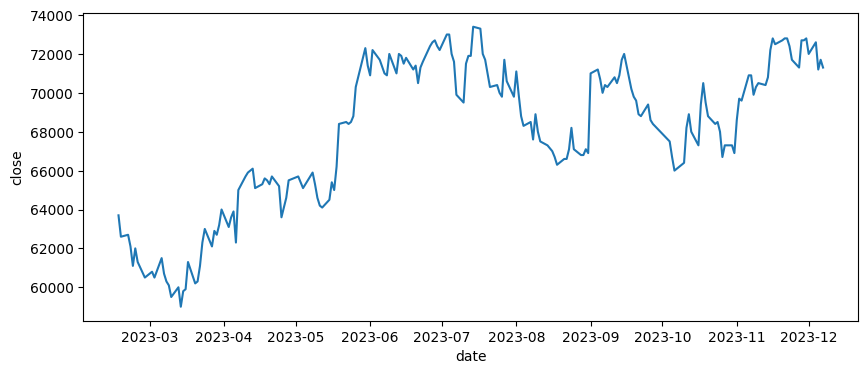

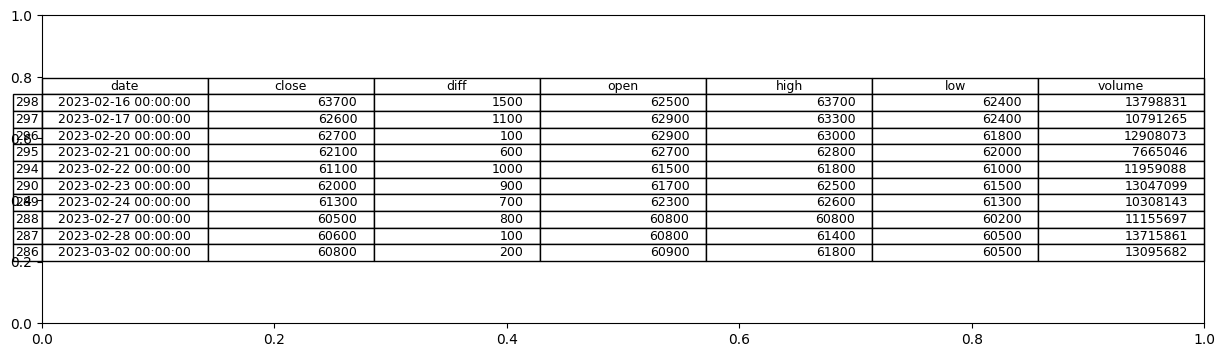

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import os

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('close')

chart_fname = os.path.join('res/stock_report', '{company}_chart.png'.format(company=company))
plt.savefig(chart_fname)

plt.show()



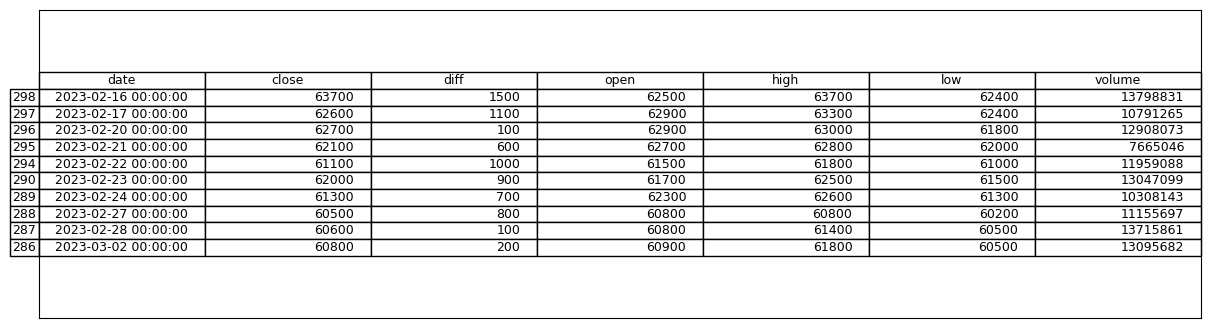

In [ ]:

plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
df = df.sort_values(by=['date'])
table(ax, df.head(10), loc='center', rowLoc='center')

### 보고서 작성하기

In [ ]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import datetime
from pptx import Presentation
from pptx.util import Inches
import os

today = datetime.datetime.today().strftime('%Y%m%d')
prs = Presentation()

# 슬라이드 추가

title_slide_layout = prs.slide_layouts[0]   # 제목생성
slide = prs.slides.add_slide(title_slide_layout)
# 제목에 값 넣기
title = slide.shapes.title
title.text =  '주식 보고서'

# 부제목
subtitle = slide.placeholders[1] # 제목상자는 0 부제목은 1
subtitle.text = '보고서 작성일 : {}'.format(today)


ppt_fname = os.path.join('res/stock_report', 'stock_report.pptx')
prs.save(ppt_fname)

In [ ]:
ㅡ